<img src = "https://drive.google.com/uc?export=view&id=10DJdk95gzrY6H-dKEFKshN814gdMc9FV" alt = "Encabezado MLDS" width = "100%">  </img>

# **Entendimiento y Preparación de los Datos**
---

Este notebook es una plantilla que le puede servir como guía para el segundo entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. Juan Sebastian Malagón Torres

## **1. Análisis Exploratorio de los Datos**
---

Normalmente en el análisis exploratorio, se trata de dar respuesta a los siguientes elementos:

In [ ]:
#Carga de datos
!pip install medmnist
!pip install ydata-profiling

In [ ]:
from medmnist import BreastMNIST
from ydata_profiling import ProfileReport
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_set = BreastMNIST(split="train", download=True)
val_set = BreastMNIST(split="val", download=True)
test_set = BreastMNIST(split="test", download=True)

Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz


In [ ]:
train_set

Dataset BreastMNIST of size 28 (breastmnist)
    Number of datapoints: 546
    Root location: /root/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0

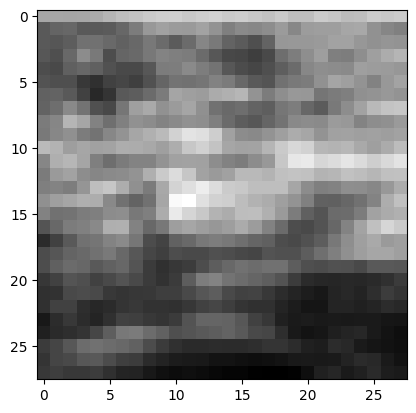

In [ ]:
plt.imshow(train_set.imgs[0], cmap = 'gray')

### **1.1. Resumen General**
---

- ¿Cuántos documentos tiene el *dataset*?
- ¿En qué formato están almacenados los datos?
- ¿Qué tamaño en MB tiene el conjunto de datos?


La base de datos viene distribuidas en tres archivos .npz (train, val. test) corrompiéndose a 780 casos distintos de exploración ecográfica en pacientes con cáncer de mama. El conjunto de datos tiene un peso aproximado de  1 Gb.

### **1.2. Resumen de la Calidad de los datos**
---

- ¿Se detecta la ausencia de datos, la presencia de documentos vacíos o la existencia de datos de baja calidad en el conjunto?
- ¿Se identifican documentos ilegibles o con dificultades de codificación durante la revisión del conjunto de datos?
- ¿Se observa una diversidad de formatos en el conjunto de datos que pueda dificultar su consistencia o comprensión?
- ¿Se identificaron y abordaron posibles problemas, como valores atípicos, duplicados o datos faltantes?



El conjunto de datos se encuentra en una condición propicia par trabajar, pues no se identifican datos nulos en ninguno de los sub-conjuntos. Adicionalmente, todas las imágenes son del mismo tamaño (28 x 28) por lo que no es necesario ningún tipo de corrección por formato. Finalmente, observando los diagramas de caja no se identifican out-liers relacionados con posibles errores de medición.

In [ ]:
train_imgs = train_set.imgs
train_imgs = train_imgs.reshape(len(train_imgs), 28*28)
train_imgs = pd.DataFrame(train_imgs)
train_imgs['y'] = train_set.labels

val_imgs = val_set.imgs
val_imgs = val_imgs.reshape(len(val_imgs), 28*28)
val_imgs = pd.DataFrame(val_imgs)
val_imgs['y'] = val_set.labels

test_imgs = test_set.imgs
test_imgs = test_imgs.reshape(len(test_imgs), 28*28)
test_imgs = train_set.labels = pd.DataFrame(test_imgs)
test_imgs['y'] = test_set.labels

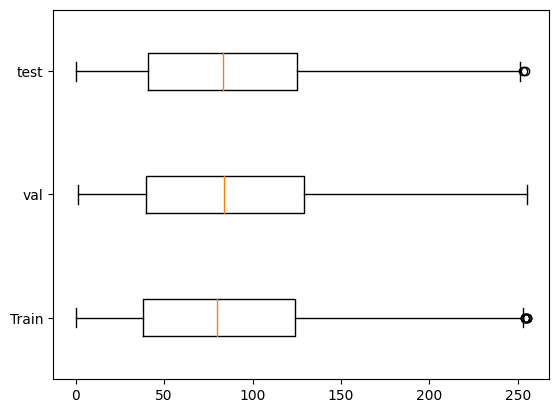

In [ ]:
values = [train_imgs.to_numpy()[:,:-1].flatten(),
          val_imgs.to_numpy()[:,:-1].flatten(),
          test_imgs.to_numpy()[:,:-1].flatten()]

plt.boxplot(values, vert=False, labels=['Train', 'val', 'test'])
plt.show()

In [ ]:
data = pd.concat((train_imgs, val_imgs, test_imgs), axis= 0)
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,y
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,...,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,150.196154,149.217949,148.630769,149.133333,149.712821,149.600000,150.410256,150.967949,150.670513,150.176923,...,33.746154,33.601282,33.473077,33.326923,33.296154,33.508974,33.489744,33.203846,32.762821,0.730769
std,38.080129,36.784613,35.570640,34.608838,33.736609,33.491846,33.364189,32.845150,32.476482,32.111279,...,28.753785,28.165725,27.723521,27.338125,27.287294,27.796735,27.396741,26.541623,25.592871,0.443845
min,1.000000,2.000000,1.000000,4.000000,13.000000,8.000000,9.000000,13.000000,26.000000,33.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,137.750000,136.000000,135.000000,135.750000,137.000000,135.000000,134.000000,135.000000,135.000000,135.750000,...,15.000000,15.000000,16.000000,16.000000,16.000000,17.000000,17.000000,18.000000,18.000000,0.000000
50%,161.000000,160.000000,158.000000,159.000000,159.000000,160.000000,161.000000,161.000000,160.000000,159.000000,...,23.000000,23.000000,24.000000,24.000000,24.000000,24.000000,25.000000,24.500000,25.000000,1.000000
75%,176.000000,174.000000,172.000000,173.000000,172.000000,172.000000,174.000000,174.000000,174.000000,173.000000,...,46.000000,46.000000,44.250000,45.000000,43.000000,42.000000,43.000000,42.000000,42.000000,1.000000
max,249.000000,244.000000,241.000000,243.000000,238.000000,233.000000,239.000000,242.000000,239.000000,237.000000,...,177.000000,184.000000,182.000000,149.000000,145.000000,180.000000,171.000000,178.000000,178.000000,1.000000


### **1.3. Tipos de variables**
---

- ¿El conjunto de datos tiene una variable objetivo a estimar?, de ser así, ¿es una variable continúa o categórica?
- Analice la distribución de las etiquetas, identifique si hay desbalanceo de datos.
- ¿El conjunto de datos cuenta con otras variables adicionales?, de ser así, debe analizar cuáles se incorporarán en el modelo y hacer un análisis descriptivo de las mismas.



El conjunto de datos constituye una tarea supervisada de clasificación, donde se busca estimar si el tumor presente en la imagen es benigno(1) o maligno(0). La variable objetivo se encuentra desbalanceada en una tasa 1:3, lo que seguiré la necesidad de implementar procesos de balanceo.

In [ ]:
prof = ProfileReport(data, minimal=True)
prof.to_file(output_file='data report.html')

In [ ]:
prof

Output hidden; open in https://colab.research.google.com to view.

### **1.4. Relación Entre Variables**
---

- Analice si existe alguna relación entre las variables. Puede utilizar medidas de correlación o visualizaciones.
- Identifique si hay redundancia entre las variables para una posterior eliminación o selección.

In [ ]:
X = data.drop(['y'], axis=1)
y = data['y'].copy()

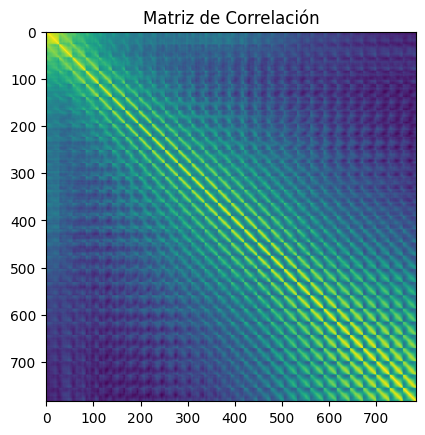

In [ ]:
corr_matrix = X.corr()
plt.imshow(corr_matrix)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
Z = []
P = []
for i in range (784):
  z,p = stats.pointbiserialr(X[str(i)], y)
  Z.append(z)
  P.append(p)

print(f"Number of related pixels: {np.sum(np.array(P) < (0.05/len(P)))}")

Number of related pixels: 293


## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*